[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
442
-1.6063539387545234e-13
mean = -3.6342849293088766e-16
sd = 0.04761904761904939
mean2 = -1.0989198490350814e-18
sd2 = 1.0000000000000007
mean3 = -2.6625258056621402e-17
442
5.782874179516284e-14
mean = 1.3083425745511955e-16
sd = 0.04761904761904773
mean2 = -6.6563145141553505e-18
sd2 = 0.9999999999999943
mean3 = -5.525996955147838e-17
442
-3.5560443478743764e-13
mean = -8.045349203335693e-16
sd = 0.04761904761905209
mean2 = 3.2025664171879517e-18
sd2 = 0.9999999999999998
mean3 = 1.607562750588462e-

Text(0,0.5,'Prediction')

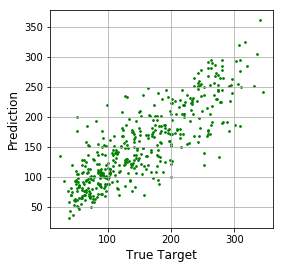

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math
import statistics
import scipy
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy import ndimage
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print(X)
n=442
n2=10
for j in range(n2):
    mean=0
    mean2=0
    mean3=0
    sum1=0.0
    sums1=0
    sum2=0
    sums2=0
    sum3=0
    sd1=0
    sd2=0
    for i in range(n):
        sum1=sum1+X[i,j]
    print(n)
    mean=sum1/n
    print(sum1)
    print(f'mean = {mean}')
    
    for i in range(n):
        sums1=sums1+((X[i,j]-mean)**2)
    sd1=math.sqrt(sums1/(n-1))
    print(f'sd = {sd1}')
    
    for i in range(n):
        X[i,j]=(X[i,j]-mean)
        sum2=sum2+X[i,j]
    mean2=sum2/n
    print(f'mean2 = {mean2}')
    
    for i in range(n):
        X[i,j]=(X[i,j])/sd1
        sum3=sum3+X[i,j]
        sums2=sums2+((X[i,j]-mean2)**2)
    mean3=sum3/n
    sd2=math.sqrt(sums2/(n-1))
    print(f'sd2 = {sd2}')
    print(f'mean3 = {mean3}')  

def gaussian(x, u, sigma):
    return (np.exp(-0.5 * np.linalg.norm(x-u) / sigma))

N, p = X.shape
print(N, p)
# Space for design matrix
#
M = 150
U = np.zeros((N,M))
# Basis function locations at random
#
kmeans = KMeans(n_clusters=M)
kmeans.fit(X)
labels=kmeans.predict(X)
C = kmeans.cluster_centers_
print(C)
print(C.shape)
# Basis function range as distance between two random data
#
sigma= np.mean(scipy.spatial.distance.pdist(X))

# Construct the design matrix
#
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(X[i,:], C[j,:], sigma)
# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y
# Predicted values on training data
#
yh = U @ l
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='g', s=3)
ax.grid(True)
ax.set_title("Implementation", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)










